<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/AdvancedMultivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariable regression Tutorial
In this last excercise, we will take data handling and model creation one step further and look in to machine learning techniques. The content is adapted from the paper [Machine Learning for Materials Scientists: An Introductory Guide toward Best Practices](https://pubs.acs.org/doi/full/10.1021/acs.chemmater.0c01907).

# 1. Data loading, cleanup and processing
adapted from
The first step to a ML project is to obtain the dataset you will be working with. There are many repositories for materials science-specific data (whether online or offline)---consult the accompanying paper for a list of the more commonly used ones.

Once you have identified the repository and dataset you will use for your project, you will have to download it to your local machine, or establish a way to reliably access the dataset. Consult the documentation of the repository for how to do this.

For this tutorial, we have collected heat capacity (
) data from the [NIST-JANAF Thermochemical Tables](https://doi.org/10.18434/T42S31).

In [1]:
# install missing pacjkages
!pip install -U ydata-profiling[notebook]==4.0.0 # matplotlib==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.4 MB/s eta 0:0

In [2]:
# load necessarry libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from ydata_profiling import ProfileReport

## Load data
Using Pandas, we read in the dataset into a DataFrame.

We also print the shape of the DataFrame, which indicates the number of rows and columns in this dataset.

In [3]:
url = r'https://raw.githubusercontent.com/peterbmob/DHMVADoE/main/DATA/cp_data_demo.csv'
df = pd.read_csv(url)
print(f'Original DataFrame shape: {df.shape}')

Original DataFrame shape: (4583, 3)


## Examine the data
We examine some rows and look at the data's basic statistics.

We see that the dataset contains information about the formula, measurement condition (in this case, temperature in K), and the target property, heat capacity (in J/(mol * K)).

In [4]:
df.head(10)

FORMULA  CONDITION: Temperature (K)  PROPERTY: Heat Capacity (J/mol K)
0    B2O3                      1400.0                            134.306
1    B2O3                      1300.0                            131.294
2    B2O3                      1200.0                            128.072
3    B2O3                      1100.0                            124.516
4    B2O3                      1000.0                            120.625
5    B2O3                       900.0                            116.190
6    B2O3                       800.0                            111.169
7    B2O3                       723.0                            106.692
8    B2O3                       700.0                            105.228
9    B2O3                       600.0                             98.115

First thing you should notice: we have many observations of the same compound (B2O3) but measured at different measurement conditions, resulting in a different property value.

We can get some simple summary statistics of the DataFrame by calling the .describe() method on the database.

In [5]:
df.describe()

CONDITION: Temperature (K)  PROPERTY: Heat Capacity (J/mol K)
count                 4579.000000                        4576.000000
mean                  1170.920341                         107.483627
std                    741.254366                          67.019055
min                  -2000.000000                        -102.215000
25%                    600.000000                          61.312500
50%                   1000.000000                          89.497000
75%                   1600.000000                         135.645000
max                   4700.000000                         494.967000

Using the pandas-profiling library, we can generate a more in-depth report of our starting dataset. Note that generating this profile report might take upwards of 20 seconds.

In [6]:
profile = ProfileReport(df.copy(), title='Pandas Profiling Report of Cp dataset', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Notice a few things from the profile report:

- We have some missing cells in the dataset ("Overview" tab)
- We have some unrealistic Temperature and Heat Capacity values in the dataset ("Variables" tab)
- We have some missing Temperature, Formula and Heat Capacity values in the dataset ("Variables" tab)

Also notice that on the "Overview" tab, there is the following warning: FORMULA has a high cardinality: 245 distinct values.
Cardinality is the number of distinct values in a column of a table, relative to the number of rows in the table.

In our dataset, we have a total of 4583 data observations, but only 245 distinct formulae. We will have to keep this in mind later, when we process and split the dataset.

## Rename the column names for brevity

In [7]:

df.columns

Index(['FORMULA', 'CONDITION: Temperature (K)',
       'PROPERTY: Heat Capacity (J/mol K)'],
      dtype='object')

In [8]:
rename_dict = {'FORMULA': 'formula',
               'CONDITION: Temperature (K)': 'T',
               'PROPERTY: Heat Capacity (J/mol K)': 'Cp'}
df = df.rename(columns=rename_dict)
df.columns

Index(['formula', 'T', 'Cp'], dtype='object')

## Check for and remove NaN values

In [9]:
# Check for NaNs in the respective dataset columns, and get the indices
df2 = df.copy()
bool_nans_formula = df2['formula'].isnull()
bool_nans_T = df2['T'].isnull()
bool_nans_Cp = df2['Cp'].isnull()

# Drop the rows of the DataFrame which contain NaNs
df2 = df2.drop(df2.loc[bool_nans_formula].index, axis=0)
df2 = df2.drop(df2.loc[bool_nans_T].index, axis=0)
df2 = df2.drop(df2.loc[bool_nans_Cp].index, axis=0)

print(f'DataFrame shape before dropping NaNs: {df.shape}')
print(f'DataFrame shape after dropping NaNs: {df2.shape}')

DataFrame shape before dropping NaNs: (4583, 3)
DataFrame shape after dropping NaNs: (4570, 3)


Pandas also includes the convenient built-in method .dropna() to check for and remove NaNs in-place:



In [10]:
df3 = df.copy()
df3 = df3.dropna(axis=0, how='any')

print(f'DataFrame shape before dropping NaNs: {df.shape}')
print(f'DataFrame shape after dropping NaNs: {df3.shape}')

df = df3.copy()

DataFrame shape before dropping NaNs: (4583, 3)
DataFrame shape after dropping NaNs: (4570, 3)


## Check for and remove unrealistic values
In some cases, you might also get data values that simply don't make sense. For our dase, this could be negative values in the temperature or heat capacity values.

In [11]:
bool_invalid_T = df['T'] < 0
bool_invalid_Cp = df['Cp'] < 0

df = df.drop(df.loc[bool_invalid_T].index, axis=0)
df = df.drop(df.loc[bool_invalid_Cp].index, axis=0)

print(f'Cleaned DataFrame shape: {df.shape}')

Cleaned DataFrame shape: (4564, 3)


## Save cleaned data to csv
Finally, after cleaning and processing the data, you can save it to disk in a cleaned state for you to use later.

Pandas allows us to save our data as a comma separated value .csv file.

In [12]:
out_path = os.path.join('cp_data_cleaned.csv')
df.to_csv(out_path, index=False)

In [ ]:
!ls

# 3. Data Featurization
Here, we will show some simple examples of featurizing materials composition data using so-called "composition-based feature vectors", or CBFVs. This methods represents a single chemical formula as one vector based on its constituent atoms' chemical properties (refer to the paper for more information and references).

Note that the steps shown in this notebook are intended to demonstrate the best practices associated with featurizing materials data, using one way of featurizing materials composition data as an example. Depending on your input data and your particular modeling needs, the data featurization method and procedure you use may be different than the example shown here.

In [ ]:
# As usual, first load necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from collections import OrderedDict

# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(RNG_SEED)

## Load the data

In [25]:
PATH = os.getcwd()
data_path = os.path.join(PATH, 'cp_data_cleaned.csv')

df = pd.read_csv(data_path)
print(f'Full DataFrame shape: {df.shape}')

Full DataFrame shape: (4564, 3)


## Separate the DataFrame into your input variables (X) and target variables (y)
The X will be used as the input data, and y will be used as the prediction targets for your ML model.

If your target variables are discrete (such as metal/non-metal or types of crystal structures), then you will be performing a classification task. In our case, since our target variables are continuous values (heat capacity), we are performing a regression task.

In [26]:
X = df[['formula', 'T']]
y = df['Cp']

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (4564, 2)
Shape of y: (4564,)


## Generate features using the CBFV package
To featurize the chemical compositions from a chemical formula (e.g. "Al2O3") into a composition-based feature vector (CBFV), we use the open-source [CBFV package](https://github.com/kaaiian/CBFV).

To use it, we need to download the package. This we can do by cloning the git repository to our colab environment.


In [16]:
! git clone https://github.com/Kaaiian/CBFV.git

Cloning into 'CBFV'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 235 (delta 35), reused 37 (delta 27), pack-reused 184
Receiving objects: 100% (235/235), 5.12 MiB | 16.98 MiB/s, done.
Resolving deltas: 100% (102/102), done.


now we can import the module

In [17]:
# Import the package and the generate_features function
from CBFV.cbfv.composition import generate_features

The generate_features function from the CBFV package expects an input DataFrame containing at least the columns ['formula', 'target']. You may also have extra feature columns (e.g., temperature or pressure, other measurement conditions, etc.).

In our dataset, Cp represents the target variable, and T is the measurement condition. Since the generate_features function expects the target variable column to be named target, we have to rename the Cp column.

In [27]:
print('DataFrame column names before renaming:')
print(df.columns)

rename_dict = {'Cp': 'target'}
df = df.rename(columns=rename_dict)


print('\nDataFrame column names after renaming:')
print(df.columns)


DataFrame column names before renaming:
Index(['formula', 'T', 'Cp'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'T', 'target'], dtype='object')


Now we can use the generate_features function to generate the CBFVs from the input data.

Note that we have specified several keyword arguments in our call to generate_features:

- elem_prop='oliynyk'
- drop_duplicates=False
- extend_features=True
- sum_feat=True

A short explanation for the choice of keyword arguments is below:

- The elem_prop parameter specifies which CBFV featurization scheme to use (there are several). For this tutorial, we have chosen to use the oliynyk CBFV featurization scheme.
- The drop_duplicates parameter specifies whether to drop duplicate formulae during featurization. In our case, we want to preserve duplicate formulae in our data (True), since we have multiple heat capacity measurements (performed at different temperatures) for the same compound.
- The extend_features parameter specifies whether to include extended features (features that are not part of ['formula', 'target']) in the featurized data. In our case, this is our measurement temperature, and we want to include this information (True), since this is pertinent information for the heat capacity prediction.
- The sum_feat parameter specifies whether to calculate the sum features when generating the CBFVs for the chemical formulae. We do in our case (True).

For more information about the generate_features function and the CBFV featurization scheme, refer to the [GitHub repository](https://github.com/kaaiian/CBFV).

In [28]:
X_unscaled, y, formulae, skipped = generate_features(df, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)


Processing Input Data: 100%|██████████| 4564/4564 [00:00<00:00, 11818.37it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4564/4564 [00:01<00:00, 4350.62it/s]


	Creating Pandas Objects...


To see what a featurized X matrix looks like, .head() will show us some rows:

In [29]:
X_unscaled.head()

sum_Atomic_Number  sum_Atomic_Weight  sum_Period  sum_group  sum_families  \
0               34.0            69.6202        10.0       74.0          33.0   
1               34.0            69.6202        10.0       74.0          33.0   
2               34.0            69.6202        10.0       74.0          33.0   
3               34.0            69.6202        10.0       74.0          33.0   
4               34.0            69.6202        10.0       74.0          33.0   

   sum_Metal  sum_Nonmetal  sum_Metalliod  sum_Mendeleev_Number  \
0        0.0           3.0            2.0                 405.0   
1        0.0           3.0            2.0                 405.0   
2        0.0           3.0            2.0                 405.0   
3        0.0           3.0            2.0                 405.0   
4        0.0           3.0            2.0                 405.0   

   sum_l_quantum_number  ...  mode_Melting_point_(K)  mode_Boiling_Point_(K)  \
0                   5.0  ...                   54.75                   90.15   
1                   5.0  ...                   54.75                   90.15   
2                   5.0  ...                   54.75                   90.15   
3                   5.0  ...                   54.75                   90.15   
4                   5.0  ...                   54.75                   90.15   

   mode_Density_(g/mL)  mode_specific_heat_(J/g_K)_  \
0              0.00143                         0.92   
1              0.00143                         0.92   
2              0.00143                         0.92   
3              0.00143                         0.92   
4              0.00143                         0.92   

   mode_heat_of_fusion_(kJ/mol)_  mode_heat_of_vaporization_(kJ/mol)_  \
0                        0.22259                               3.4099   
1                        0.22259                               3.4099   
2                        0.22259                               3.4099   
3                        0.22259                               3.4099   
4                        0.22259                               3.4099   

   mode_thermal_conductivity_(W/(m_K))_  mode_heat_atomization(kJ/mol)  \
0                               0.02674                          249.0   
1                               0.02674                          249.0   
2                               0.02674                          249.0   
3                               0.02674                          249.0   
4                               0.02674                          249.0   

   mode_Cohesive_energy       T  
0                  2.62  1400.0  
1                  2.62  1300.0  
2                  2.62  1200.0  
3                  2.62  1100.0  
4                  2.62  1000.0  

[5 rows x 309 columns]

In [30]:
X_unscaled.shape

(4564, 309)

Note the sum features in the CBFV, which we have included by using sum_feat=True in the call to generate_features.

Also note the temperature column T at the end of this featurized data.

What we have done above is featurize the input data. In the featurized data, each row contains a unique CBFV that describes a given chemical composition.

# 4. Data scaling & normalization
For numerical input data, scaling and normalization of the features often improves the model performance. Scaling can partially correct the discrepancy between the orders of magnitudes of the features (e.g., some numerical features being much larger or smaller than others). This typically improves the model learning performance, and in turn, improves the model performance.

We will scale then normalize our input data using scikit-learn's built-in `StandardScaler` class and `normalize` function.

Note, in addition to `StandardScaler`, other scalers such as `RobustScaler` and `MinMaxScaler` are also available in scikit-learn. Consult the documentation for the details and when to use them.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

## Scaling the data
First, we instantiate the scaler object.

In a `StandardScaler` object:

- During the `fit` process, the statistics of the input data (mean and standard deviation) are computed.
- Then, during the `transform process`, the mean and standard deviation values calculated above are used to scale the data to having zero-mean and unit variance.

Therefore, for the first time usage of the scaler, we call the `.fit_transform()` method to fit the scaler to the input data, and then to transform the same data. For subsequent uses, since we have already computed the statistics, we only call the `.transform()` method to scale data.

**Note:** you should only `.fit()` the scaler using the training dataset statistics, and then use these same statistics from the training dataset to `.transform()` the other datasets (validation and train).

In [31]:
scaler = StandardScaler()

X = scaler.fit_transform(X_unscaled)

## Normalizing the scaled data
We repeat a similar process for normalizing the data. Here, there is no need to first fit the normalizer, since the normalizer scales the rows of the input data to unit norm independently of other rows.

The normalizer is different to a Scaler in that the normalizer acts row-wise, whereas a Scaler acts column-wise on the input data.

In [34]:
X = normalize(X)

In [62]:
df_X=pd.DataFrame(X, columns=X_unscaled.columns)
df_X

sum_Atomic_Number  sum_Atomic_Weight  sum_Period  sum_group  \
0             -0.036419          -0.036721   -0.010419   0.044189   
1             -0.036422          -0.036724   -0.010420   0.044194   
2             -0.036424          -0.036725   -0.010421   0.044195   
3             -0.036423          -0.036725   -0.010421   0.044195   
4             -0.036421          -0.036723   -0.010420   0.044192   
...                 ...                ...         ...        ...   
4559          -0.021270          -0.018914   -0.038173  -0.045090   
4560          -0.021268          -0.018912   -0.038169  -0.045085   
4561          -0.021266          -0.018910   -0.038165  -0.045081   
4562          -0.021263          -0.018908   -0.038161  -0.045076   
4563          -0.021261          -0.018906   -0.038157  -0.045071   

      sum_families  sum_Metal  sum_Nonmetal  sum_Metalliod  \
0         0.034579  -0.088956      0.011309       0.327914   
1         0.034582  -0.088964      0.011310       0.327944   
2         0.034584  -0.088968      0.011310       0.327957   
3         0.034583  -0.088966      0.011310       0.327953   
4         0.034581  -0.088961      0.011310       0.327932   
...            ...        ...           ...            ...   
4559     -0.043885  -0.016022     -0.045102      -0.008843   
4560     -0.043881  -0.016021     -0.045098      -0.008842   
4561     -0.043876  -0.016019     -0.045093      -0.008841   
4562     -0.043872  -0.016017     -0.045088      -0.008840   
4563     -0.043866  -0.016015     -0.045083      -0.008839   

      sum_Mendeleev_Number  sum_l_quantum_number  ...  mode_Melting_point_(K)  \
0                 0.031667              0.027414  ...               -0.026967   
1                 0.031670              0.027417  ...               -0.026969   
2                 0.031671              0.027418  ...               -0.026971   
3                 0.031671              0.027417  ...               -0.026970   
4                 0.031669              0.027416  ...               -0.026968   
...                    ...                   ...  ...                     ...   
4559             -0.044567             -0.024234  ...                0.090828   
4560             -0.044562             -0.024232  ...                0.090820   
4561             -0.044558             -0.024229  ...                0.090810   
4562             -0.044553             -0.024227  ...                0.090801   
4563             -0.044548             -0.024224  ...                0.090790   

      mode_Boiling_Point_(K)  mode_Density_(g/mL)  \
0                  -0.026626            -0.028237   
1                  -0.026628            -0.028240   
2                  -0.026629            -0.028241   
3                  -0.026629            -0.028241   
4                  -0.026627            -0.028239   
...                      ...                  ...   
4559                0.117888             0.059376   
4560                0.117877             0.059370   
4561                0.117865             0.059364   
4562                0.117852             0.059358   
4563                0.117838             0.059351   

      mode_specific_heat_(J/g_K)_  mode_heat_of_fusion_(kJ/mol)_  \
0                       -0.003331                      -0.026506   
1                       -0.003331                      -0.026508   
2                       -0.003331                      -0.026509   
3                       -0.003331                      -0.026509   
4                       -0.003331                      -0.026507   
...                           ...                            ...   
4559                    -0.013718                       0.061278   
4560                    -0.013717                       0.061272   
4561                    -0.013716                       0.061266   
4562                    -0.013714                       0.061259   
4563                    -0.013712                       0.061252   

     

*5*. Making PCA analysis
Here we will use the multiple multivariate regression from sklearn.

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA().fit(X)

In [37]:
print(f"Rotation matrix:\n{pca.components_}")

Rotation matrix:
[[-2.76203799e-02 -2.11212634e-02 -7.21002934e-02 ...  4.12900619e-02
   3.72084845e-02  4.55762059e-03]
 [-5.55688630e-02 -5.43964997e-02 -3.81487262e-02 ... -4.39597101e-02
  -4.90538593e-02 -3.96862644e-03]
 [ 1.08959103e-01  1.15691238e-01  2.15691411e-02 ... -9.23921936e-02
  -7.15374286e-02 -4.03124212e-02]
 ...
 [ 0.00000000e+00 -2.19913286e-03  1.95493490e-04 ... -4.35406919e-14
   3.30126009e-14 -2.25514052e-17]
 [ 0.00000000e+00 -8.11097820e-04  7.21031117e-05 ...  4.27271066e-14
  -1.28560357e-14 -8.02309608e-18]
 [ 0.00000000e+00 -1.24245948e-02  1.10449324e-03 ...  1.18160690e-14
  -2.14455190e-16 -4.48859699e-17]]


In [38]:
print(f"Standard deviation of each principal component:\n{np.sqrt(pca.explained_variance_)}")


Standard deviation of each principal component:
[4.62854371e-01 4.14438136e-01 3.12844421e-01 2.92296503e-01
 2.43659091e-01 2.19079434e-01 1.98844027e-01 1.75257761e-01
 1.61745411e-01 1.54016614e-01 1.32223152e-01 1.24224850e-01
 1.14055462e-01 1.06278580e-01 1.02635011e-01 9.91253448e-02
 9.55738627e-02 8.84967195e-02 8.64569024e-02 7.97648839e-02
 7.88197256e-02 7.35368454e-02 7.05727128e-02 6.86099569e-02
 6.66436436e-02 6.30530158e-02 6.15616298e-02 5.87781577e-02
 5.69012697e-02 5.47090099e-02 5.27698430e-02 4.98965967e-02
 4.85891436e-02 4.59441700e-02 4.44896862e-02 4.32831414e-02
 4.16265255e-02 4.02879490e-02 3.74352660e-02 3.55887468e-02
 3.42450861e-02 3.38252706e-02 3.35069955e-02 3.15290806e-02
 3.11530106e-02 2.92837629e-02 2.88328694e-02 2.85383147e-02
 2.77082096e-02 2.66340753e-02 2.54701542e-02 2.49635532e-02
 2.30906831e-02 2.27851311e-02 2.26635767e-02 2.21296202e-02
 2.06291432e-02 2.04990818e-02 1.97613813e-02 1.89541473e-02
 1.88187740e-02 1.86490142e-02 1.7605

In [39]:
print(f"Variance explained by each principal component:\n{pca.explained_variance_}")

Variance explained by each principal component:
[2.14234169e-01 1.71758969e-01 9.78716319e-02 8.54372457e-02
 5.93697528e-02 4.79957984e-02 3.95389471e-02 3.07152828e-02
 2.61615778e-02 2.37211174e-02 1.74829619e-02 1.54318134e-02
 1.30086483e-02 1.12951365e-02 1.05339454e-02 9.82583399e-03
 9.13436323e-03 7.83166936e-03 7.47479598e-03 6.36243670e-03
 6.21254915e-03 5.40766763e-03 4.98050779e-03 4.70732619e-03
 4.44137523e-03 3.97568280e-03 3.78983427e-03 3.45487182e-03
 3.23775450e-03 2.99307576e-03 2.78465633e-03 2.48967036e-03
 2.36090487e-03 2.11086676e-03 1.97933218e-03 1.87343033e-03
 1.73276762e-03 1.62311884e-03 1.40139914e-03 1.26655890e-03
 1.17272592e-03 1.14414893e-03 1.12271875e-03 9.94082924e-04
 9.70510073e-04 8.57538773e-04 8.31334359e-04 8.14435408e-04
 7.67744877e-04 7.09373965e-04 6.48728753e-04 6.23178987e-04
 5.33179644e-04 5.19162200e-04 5.13637707e-04 4.89720091e-04
 4.25561549e-04 4.20212353e-04 3.90512192e-04 3.59259701e-04
 3.54146254e-04 3.47785732e-04 3.0995

In [40]:
print(f"Proportion of variance explained by each principal component:\n{pca.explained_variance_ratio_}")

Proportion of variance explained by each principal component:
[2.16549410e-01 1.73615178e-01 9.89293362e-02 8.63605709e-02
 6.00113651e-02 4.85144918e-02 3.99662468e-02 3.10472246e-02
 2.64443075e-02 2.39774729e-02 1.76719013e-02 1.55985859e-02
 1.31492335e-02 1.14172037e-02 1.06477864e-02 9.93202234e-03
 9.23307882e-03 7.91630666e-03 7.55557653e-03 6.43119592e-03
 6.27968853e-03 5.46610860e-03 5.03433242e-03 4.75819853e-03
 4.48937343e-03 4.01864823e-03 3.83079122e-03 3.49220882e-03
 3.27274510e-03 3.02542210e-03 2.81475027e-03 2.51657637e-03
 2.38641931e-03 2.13367901e-03 2.00072294e-03 1.89367660e-03
 1.75149374e-03 1.64065997e-03 1.41654414e-03 1.28024667e-03
 1.18539964e-03 1.15651381e-03 1.13485203e-03 1.00482604e-03
 9.80998431e-04 8.66806243e-04 8.40318637e-04 8.23237058e-04
 7.76041940e-04 7.17040210e-04 6.55739602e-04 6.29913718e-04
 5.38941747e-04 5.24772816e-04 5.19188619e-04 4.95012524e-04
 4.30160618e-04 4.24753612e-04 3.94732480e-04 3.63142241e-04
 3.57973533e-04 3.51544

In [42]:
scores = pca.transform(X)
print(f"Principal component scores:\n{scores[:10, :]}")

Principal component scores:
[[-1.24479169e-01 -4.23517842e-01 -4.22086644e-01 ...  2.08166817e-17
   7.15573434e-17  3.81639165e-17]
 [-1.24531766e-01 -4.23528772e-01 -4.21832641e-01 ...  2.08166817e-17
   6.02816408e-17  3.38271078e-17]
 [-1.24573314e-01 -4.23517215e-01 -4.21556816e-01 ...  4.16333634e-17
   5.88721780e-17  3.64291930e-17]
 ...
 [-1.24619319e-01 -4.23152823e-01 -4.19942332e-01 ...  7.63278329e-17
   5.75711354e-17  4.42354486e-17]
 [-1.24615184e-01 -4.23122359e-01 -4.19852075e-01 ...  4.16333634e-17
   9.57350518e-17  3.98986399e-17]
 [-1.24590429e-01 -4.22976173e-01 -4.19446488e-01 ...  7.63278329e-17
   7.84962373e-17  4.77048956e-17]]


# Scree plot

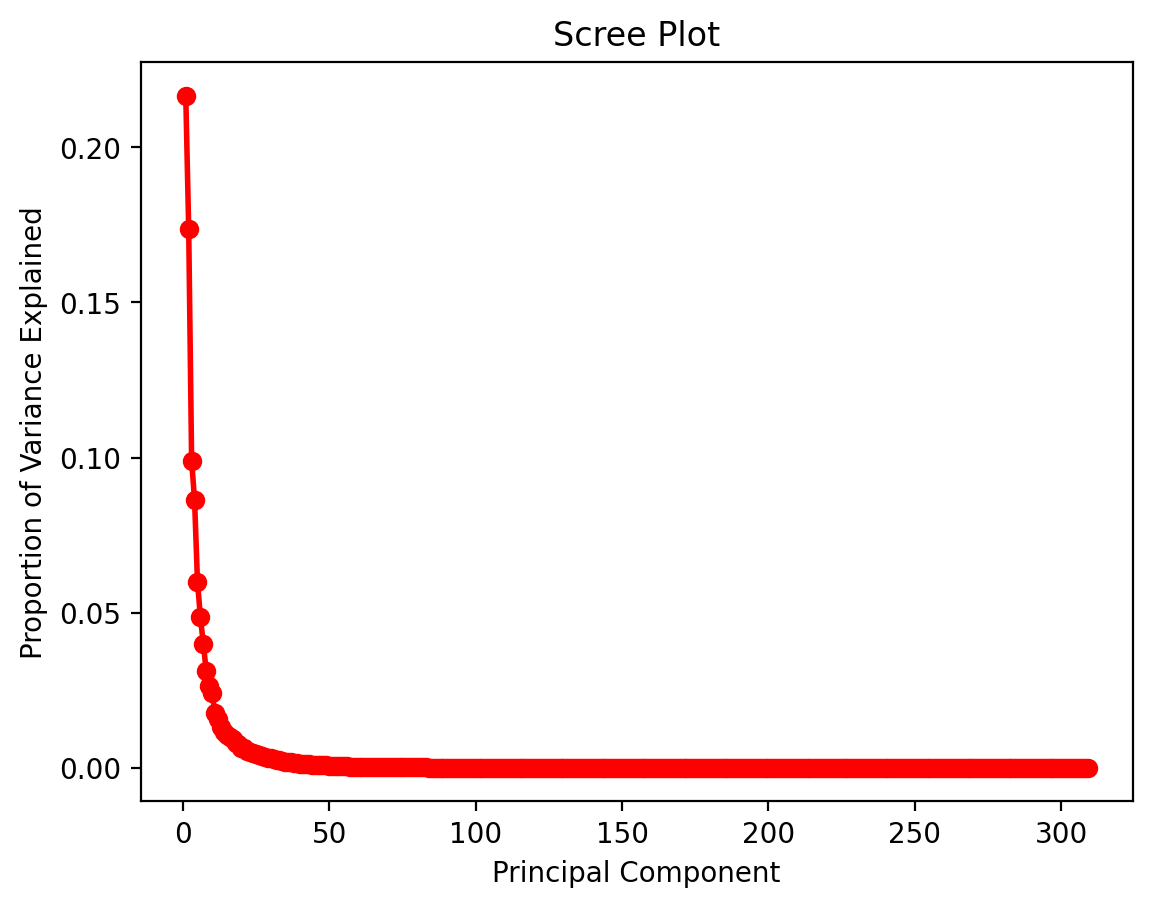

In [50]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [64]:

loadings = pd.DataFrame(pca.components_.T, index=df_X.columns)
loadings

0         1         2         3    \
sum_Atomic_Number                    -0.027620 -0.055569  0.108959 -0.081951   
sum_Atomic_Weight                    -0.021121 -0.054396  0.115691 -0.076191   
sum_Period                           -0.072100 -0.038149  0.021569 -0.104460   
sum_group                            -0.085634 -0.046423 -0.025092 -0.092788   
sum_families                         -0.084347 -0.039270 -0.036493 -0.089949   
...                                        ...       ...       ...       ...   
mode_heat_of_vaporization_(kJ/mol)_   0.066107 -0.007272 -0.035631 -0.027181   
mode_thermal_conductivity_(W/(m_K))_  0.053206  0.011305 -0.045404 -0.034665   
mode_heat_atomization(kJ/mol)         0.041290 -0.043960 -0.092392  0.045075   
mode_Cohesive_energy                  0.037208 -0.049054 -0.071537  0.042200   
T                                     0.004558 -0.003969 -0.040312  0.054737   

                                           4         5         6         7    \
sum_Atomic_Number                    -0.083017  0.026564 -0.046952  0.024321   
sum_Atomic_Weight                    -0.079414  0.031722 -0.051952  0.015009   
sum_Period                           -0.093911  0.006447 -0.030455  0.072334   
sum_group                            -0.034293  0.012165 -0.032090  0.066215   
sum_families                         -0.041019  0.046465 -0.025805  0.031829   
...                                        ...       ...       ...       ...   
mode_heat_of_vaporization_(kJ/mol)_  -0.054994  0.001184 -0.006435  0.017130   
mode_thermal_conductivity_(W/(m_K))_ -0.039451  0.002680  0.017439  0.052641   
mode_heat_atomization(kJ/mol)        -0.040235 -0.022652 -0.042560  0.043352   
mode_Cohesive_energy                 -0.040028 -0.072527 -0.045025  0.066475   
T                                    -0.008291 -0.066503 -0.047834  0.039145   

                                           8         9    ...           299  \
sum_Atomic_Number                     0.066323 -0.025150  ...  0.000000e+00   
sum_Atomic_Weight                     0.067029 -0.016113  ...  7.166223e-04   
sum_Period                            0.054323 -0.046459  ... -6.370465e-05   
sum_group                             0.007921 -0.015642  ...  5.383982e-03   
sum_families                          0.033464 -0.062317  ... -8.865454e-03   
...                                        ...       ...  ...           ...   
mode_heat_of_vaporization_(kJ/mol)_  -0.055596  0.028736  ... -5.084128e-14   
mode_thermal_conductivity_(W/(m_K))_  0.014927  0.075609  ... -4.626421e-14   
mode_heat_atomization(kJ/mol)        -0.066633 -0.039121  ... -2.168751e-14   
mode_Cohesive_energy                 -0.081899  0.000670  ...  5.663872e-15   
T                                     0.018489  0.017462  ... -2.081668e-17   

                                               300           301  \
sum_Atomic_Number                    -0.000000e+00  0.000000e+00   
sum_Atomic_Weight                    -2.847473e-04  1.387560e-03   
sum_Period                            2.531281e-05 -1.233482e-04   
sum_group                            -2.139306e-03  1.042474e-02   
sum_families                          3.522656e-03 -1.716574e-02   
...                                            ...           ...   
mode_heat_of_vaporization_(kJ/mol)_   9.124645e-14 -1.142003e-13   
mode_thermal_conductivity_(W/(m_K))_  4.373325e-14 -1.208755e-14   
mode_heat_atomization(kJ/mol)         5.231839e-14 -1.701184e-14   
mode_Cohesive_energy                 -5.218092e-14  5.648043e-15   
T                                     1.474515e-17 -6.938894e-18   

                                               302           303  \
sum_Atomic_Number                    -0.000000e+00  0.000000e+00   
sum_Atomic_Weight                     5.507496e-03  7.167116e-03   
sum_Period                           -4.895928e-04 -6.371259e-04   
sum_group                             4.137781e-02  5.384654e-02   
sum_families   

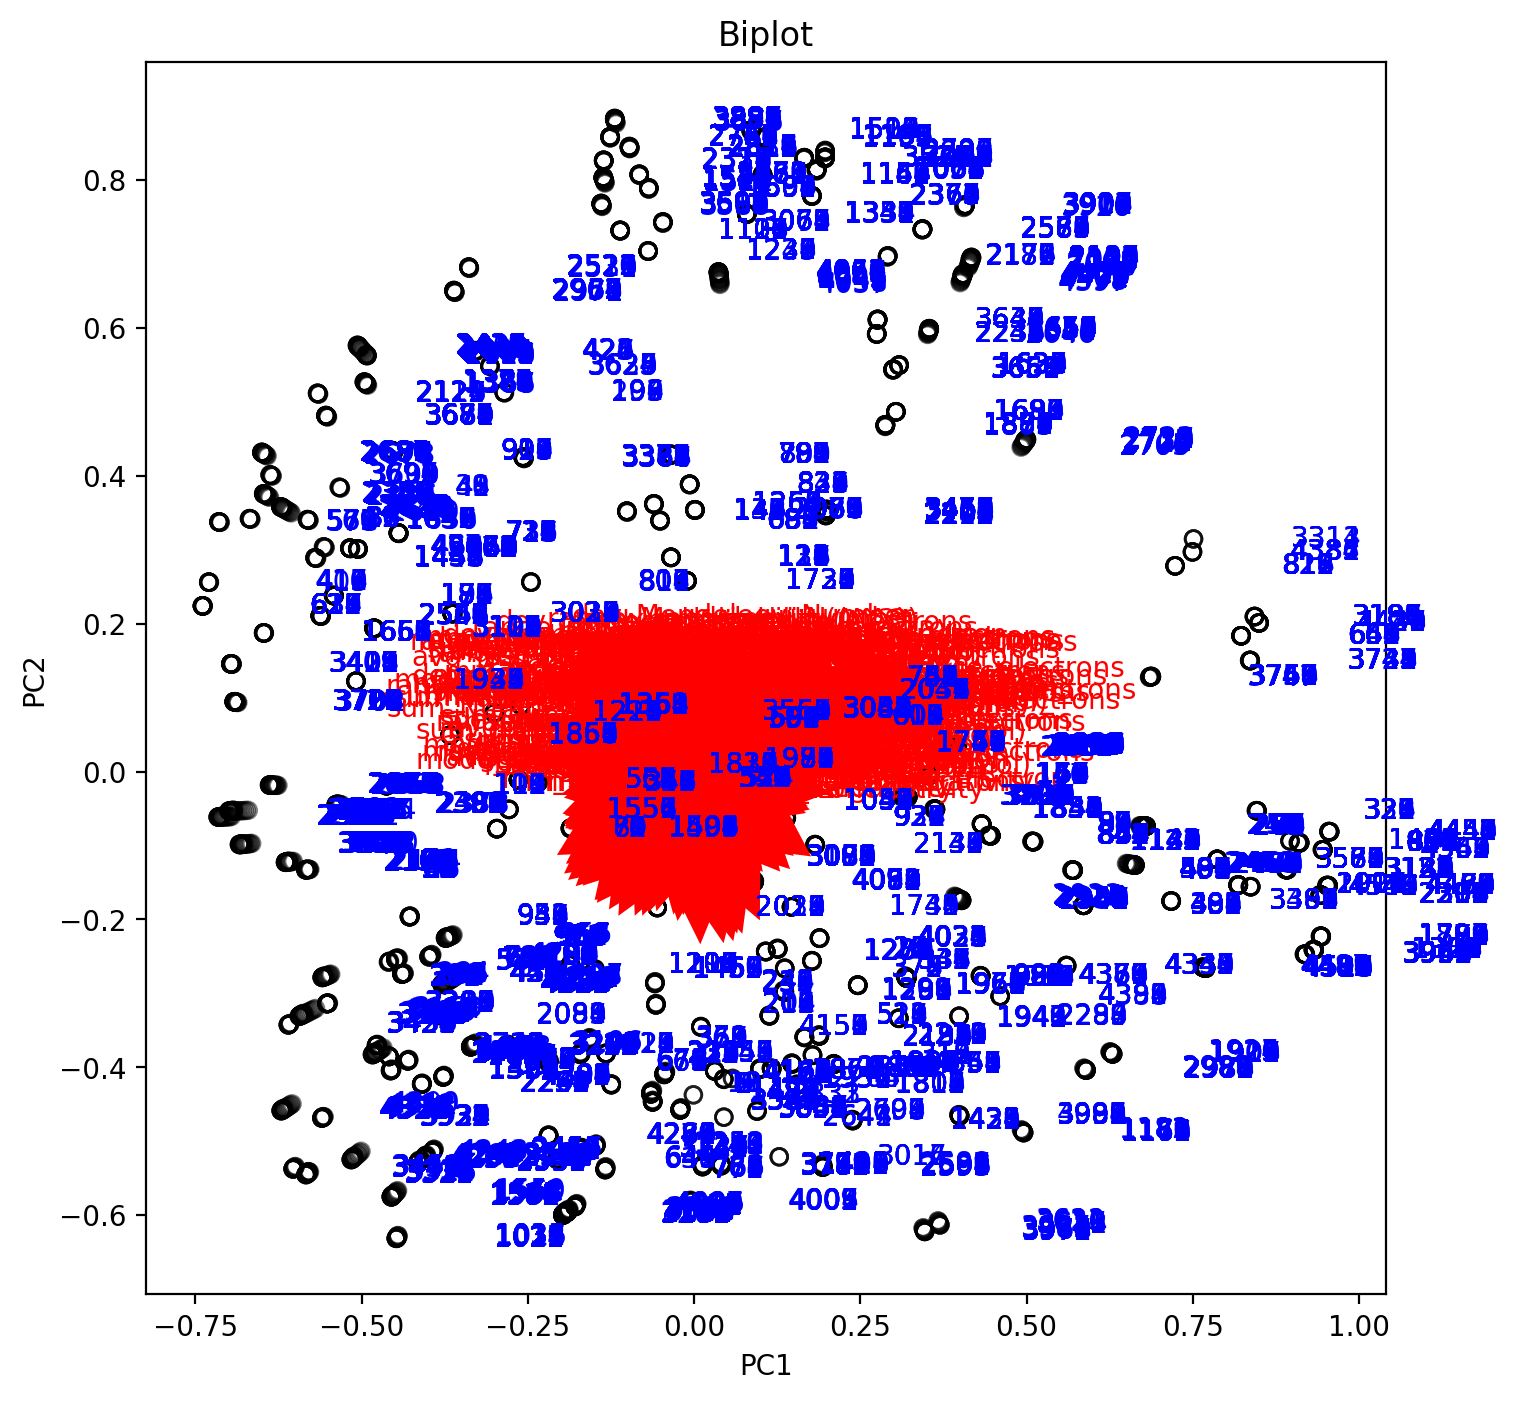

In [65]:

# biplot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    scores[:, 0],
    scores[:, 1],
    color="none",
    edgecolor="k",
    alpha=0.5,
)
for i in range(pca.components_.shape[1]):
    ax.arrow(
        0,
        0,
        pca.components_[0, i],
        pca.components_[1, i],
        head_width=0.1,
        head_length=0.1,
        linewidth=2,
        color="red",
    )
    ax.text(
        pca.components_[0, i] + 0.1,
        pca.components_[1, i] + 0.1,
        df_X.columns[i],
        color="red",
        ha="center",
        va="center",
    )
for i in range(scores.shape[0]):
    ax.text(
        scores[i, 0] + 0.2,
        scores[i, 1],
        df_X.index[i],
        color="blue",
        ha="center",
        va="center",
    )
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Biplot")
plt.show()

# How to reduce the model?

# Factor Analysis

In [ ]:
#use only 10 first columns of X


In [67]:
from sklearn.decomposition import FactorAnalysis

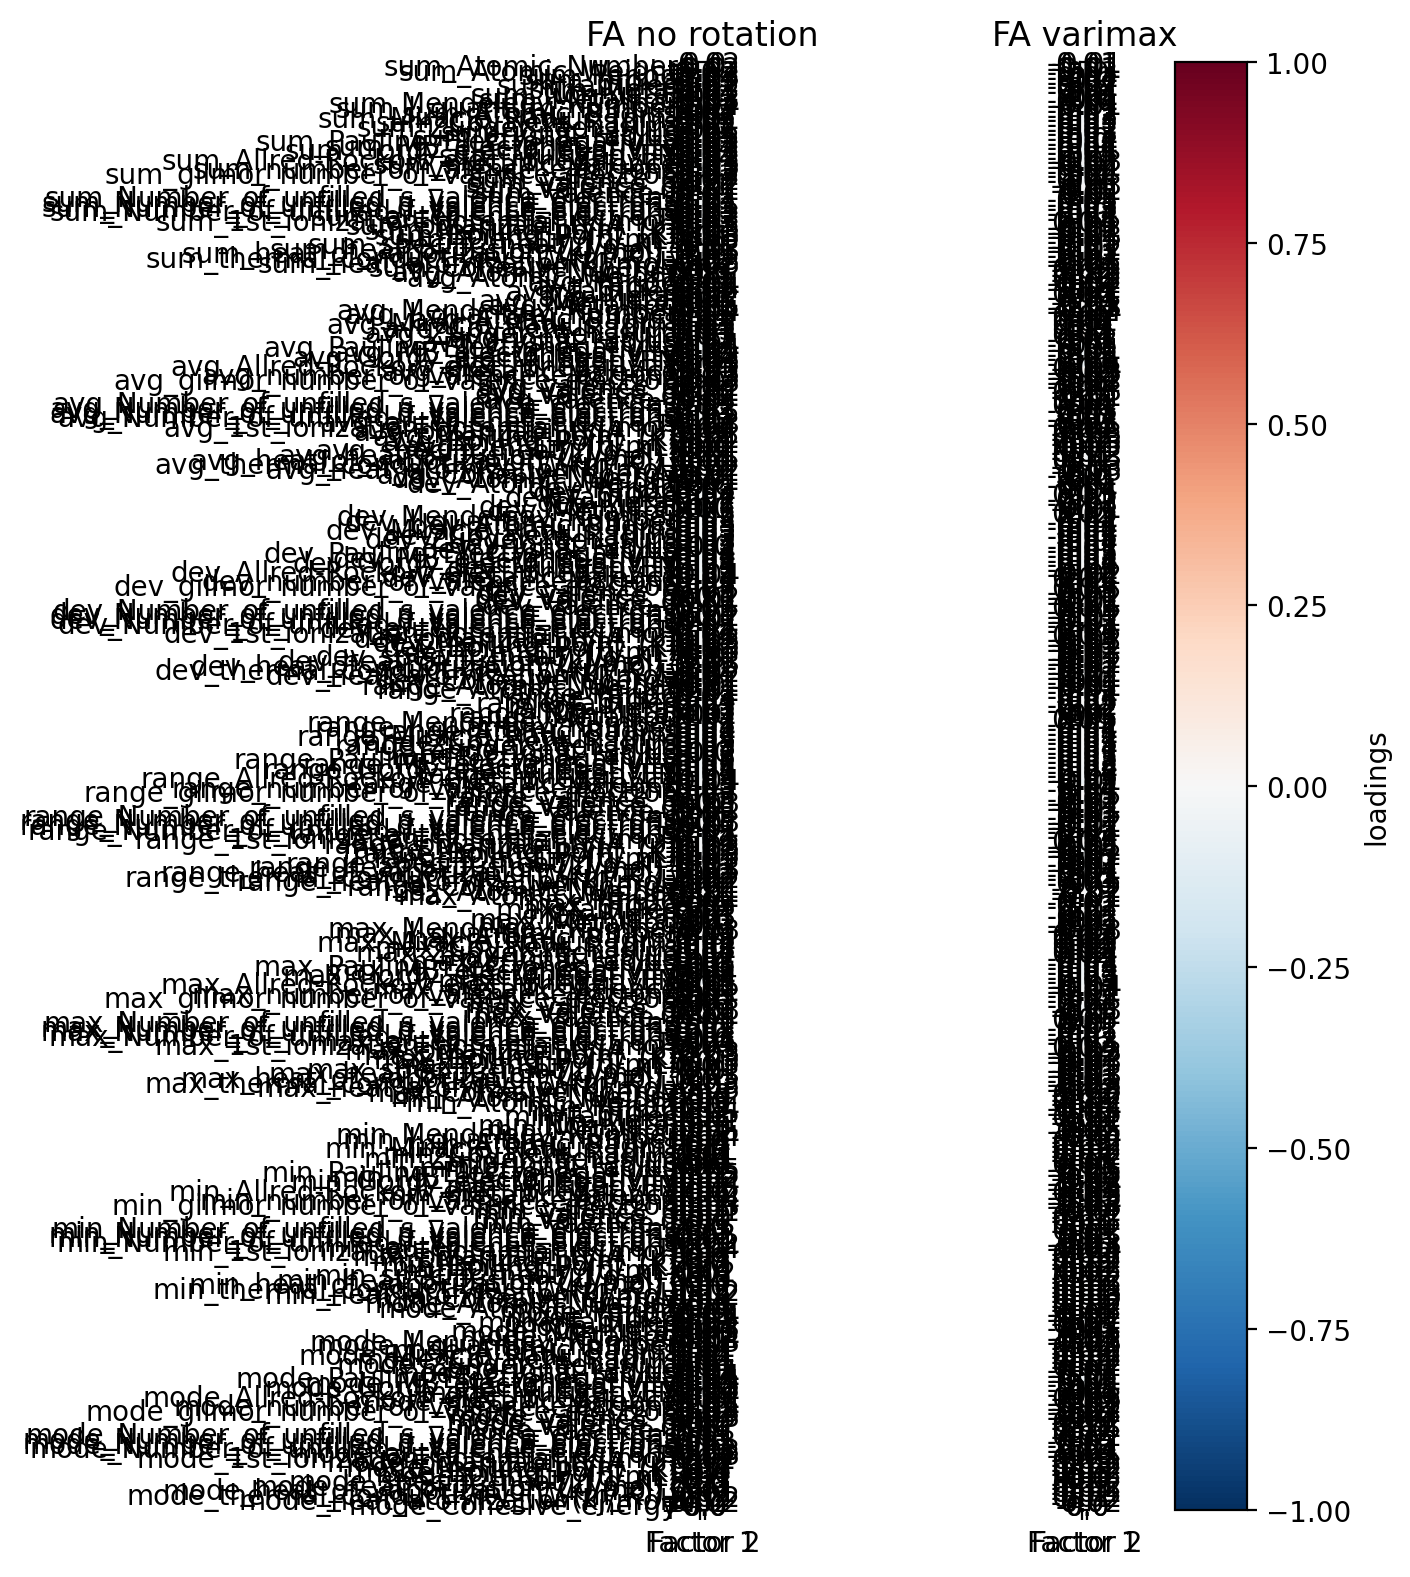

In [69]:
factors = 2 # BAsed on previous PCA
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(df_X.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(df_X.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout()

#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()

<Axes: ylabel='Uniqueness'>

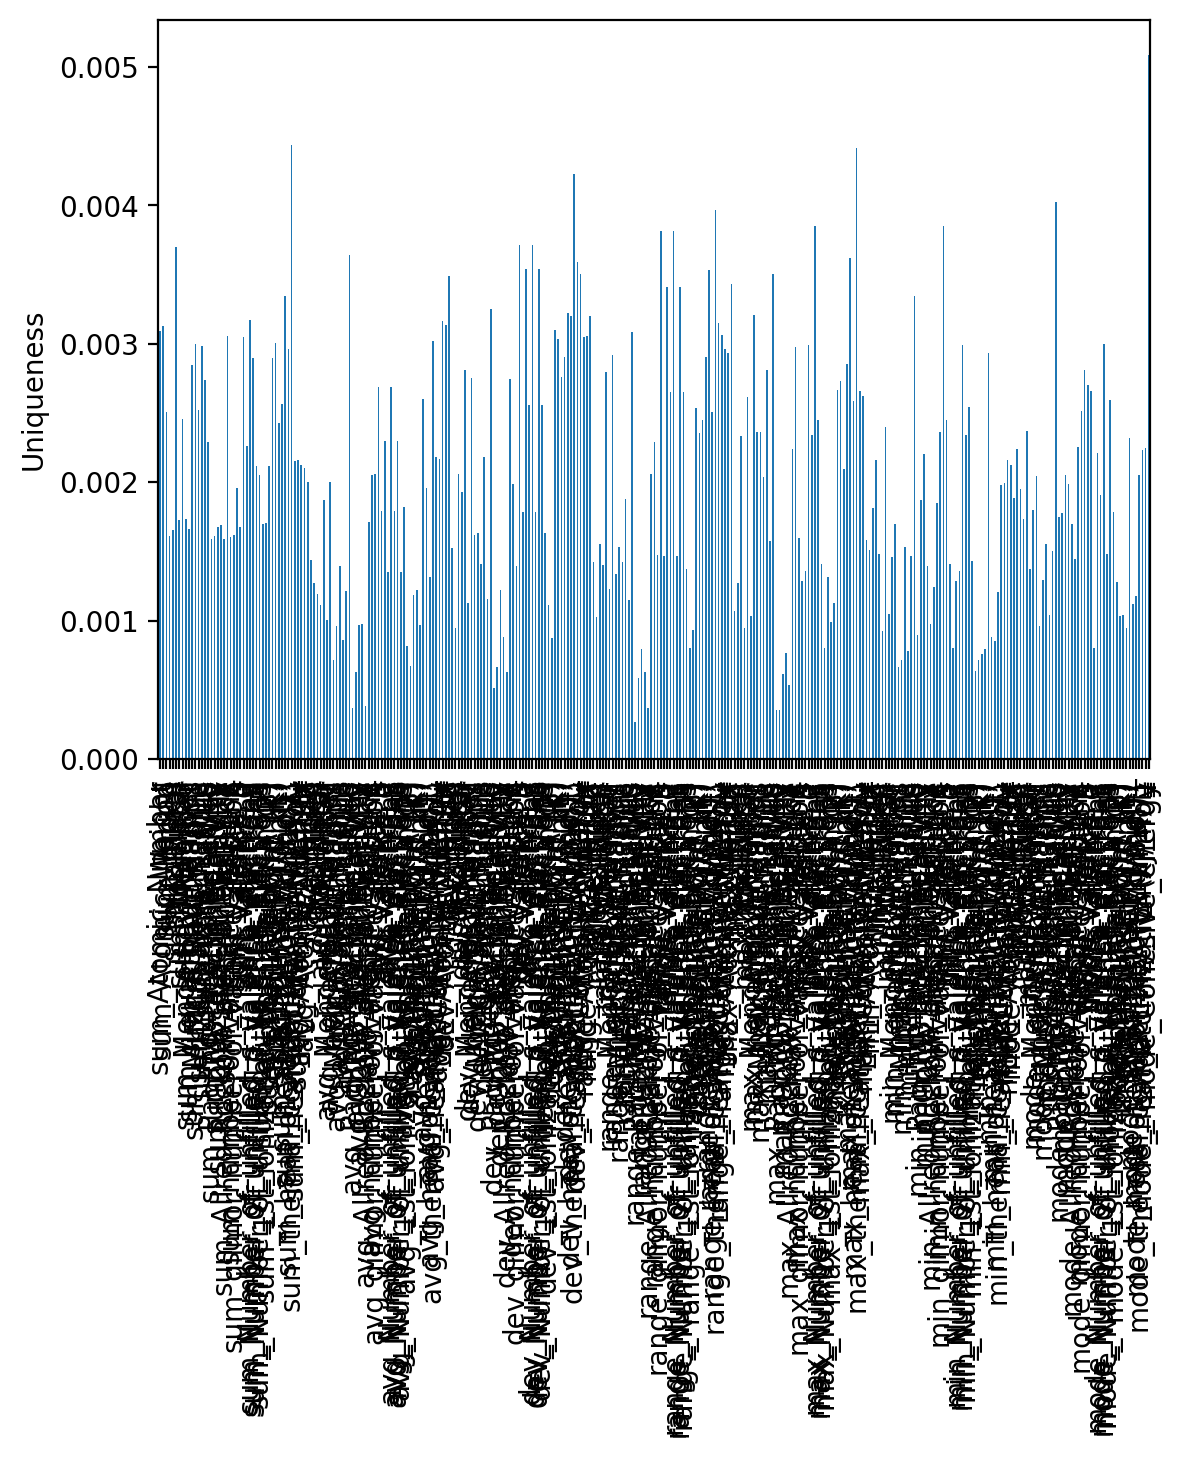

In [73]:
from pandas import read_csv, Series, DataFrame

fa = FactorAnalysis(n_components = 2, rotation="varimax")
fa.fit(X)
uniqueness = Series(fa.noise_variance_, index=df_X.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

<Axes: ylabel='communality'>

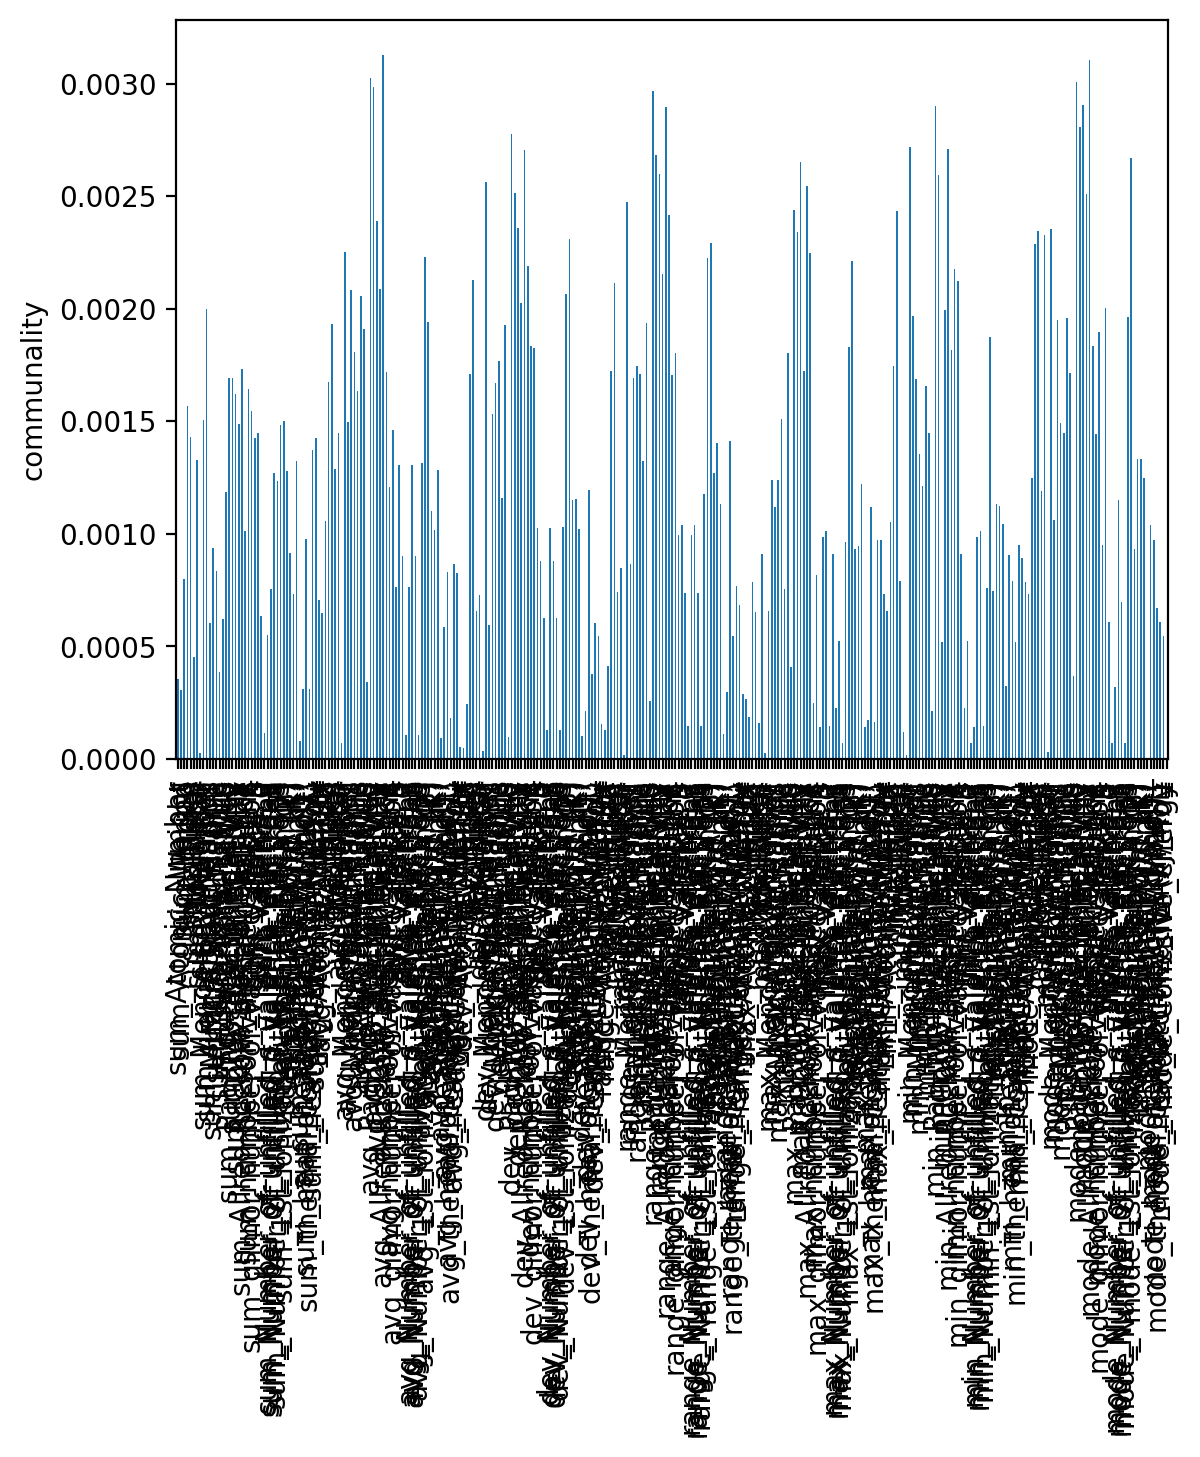

In [74]:

# Communality
communality = Series(np.square(fa.components_.T).sum(axis=1), index=df_X.columns)
communality.plot(
    kind="bar",
    ylabel="communality"
)

In [75]:
# the word 'lambda' is reserved for a python-operator, so we use the underscore at the end
lambda_ = fa.components_
psi = np.diag(uniqueness)
s = np.corrcoef(np.transpose(X))
sigma = np.matmul(lambda_.T, lambda_) + psi
residuals = (s - sigma)


In [79]:
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
#ax.set_xticks(range(5))
#ax.set_xticklabels(df_X.columns)
#ax.set_yticks(range(5))
#ax.set_yticklabels(df_X.columns)
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

fig.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

<ipython-input-79-c45f497ffbcd>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_X.columns)
<ipython-input-79-c45f497ffbcd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df_X.columns)


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x78dd1f3d1630> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x78dd1f3d08b0> (for post_execute):


KeyboardInterrupt: ignored

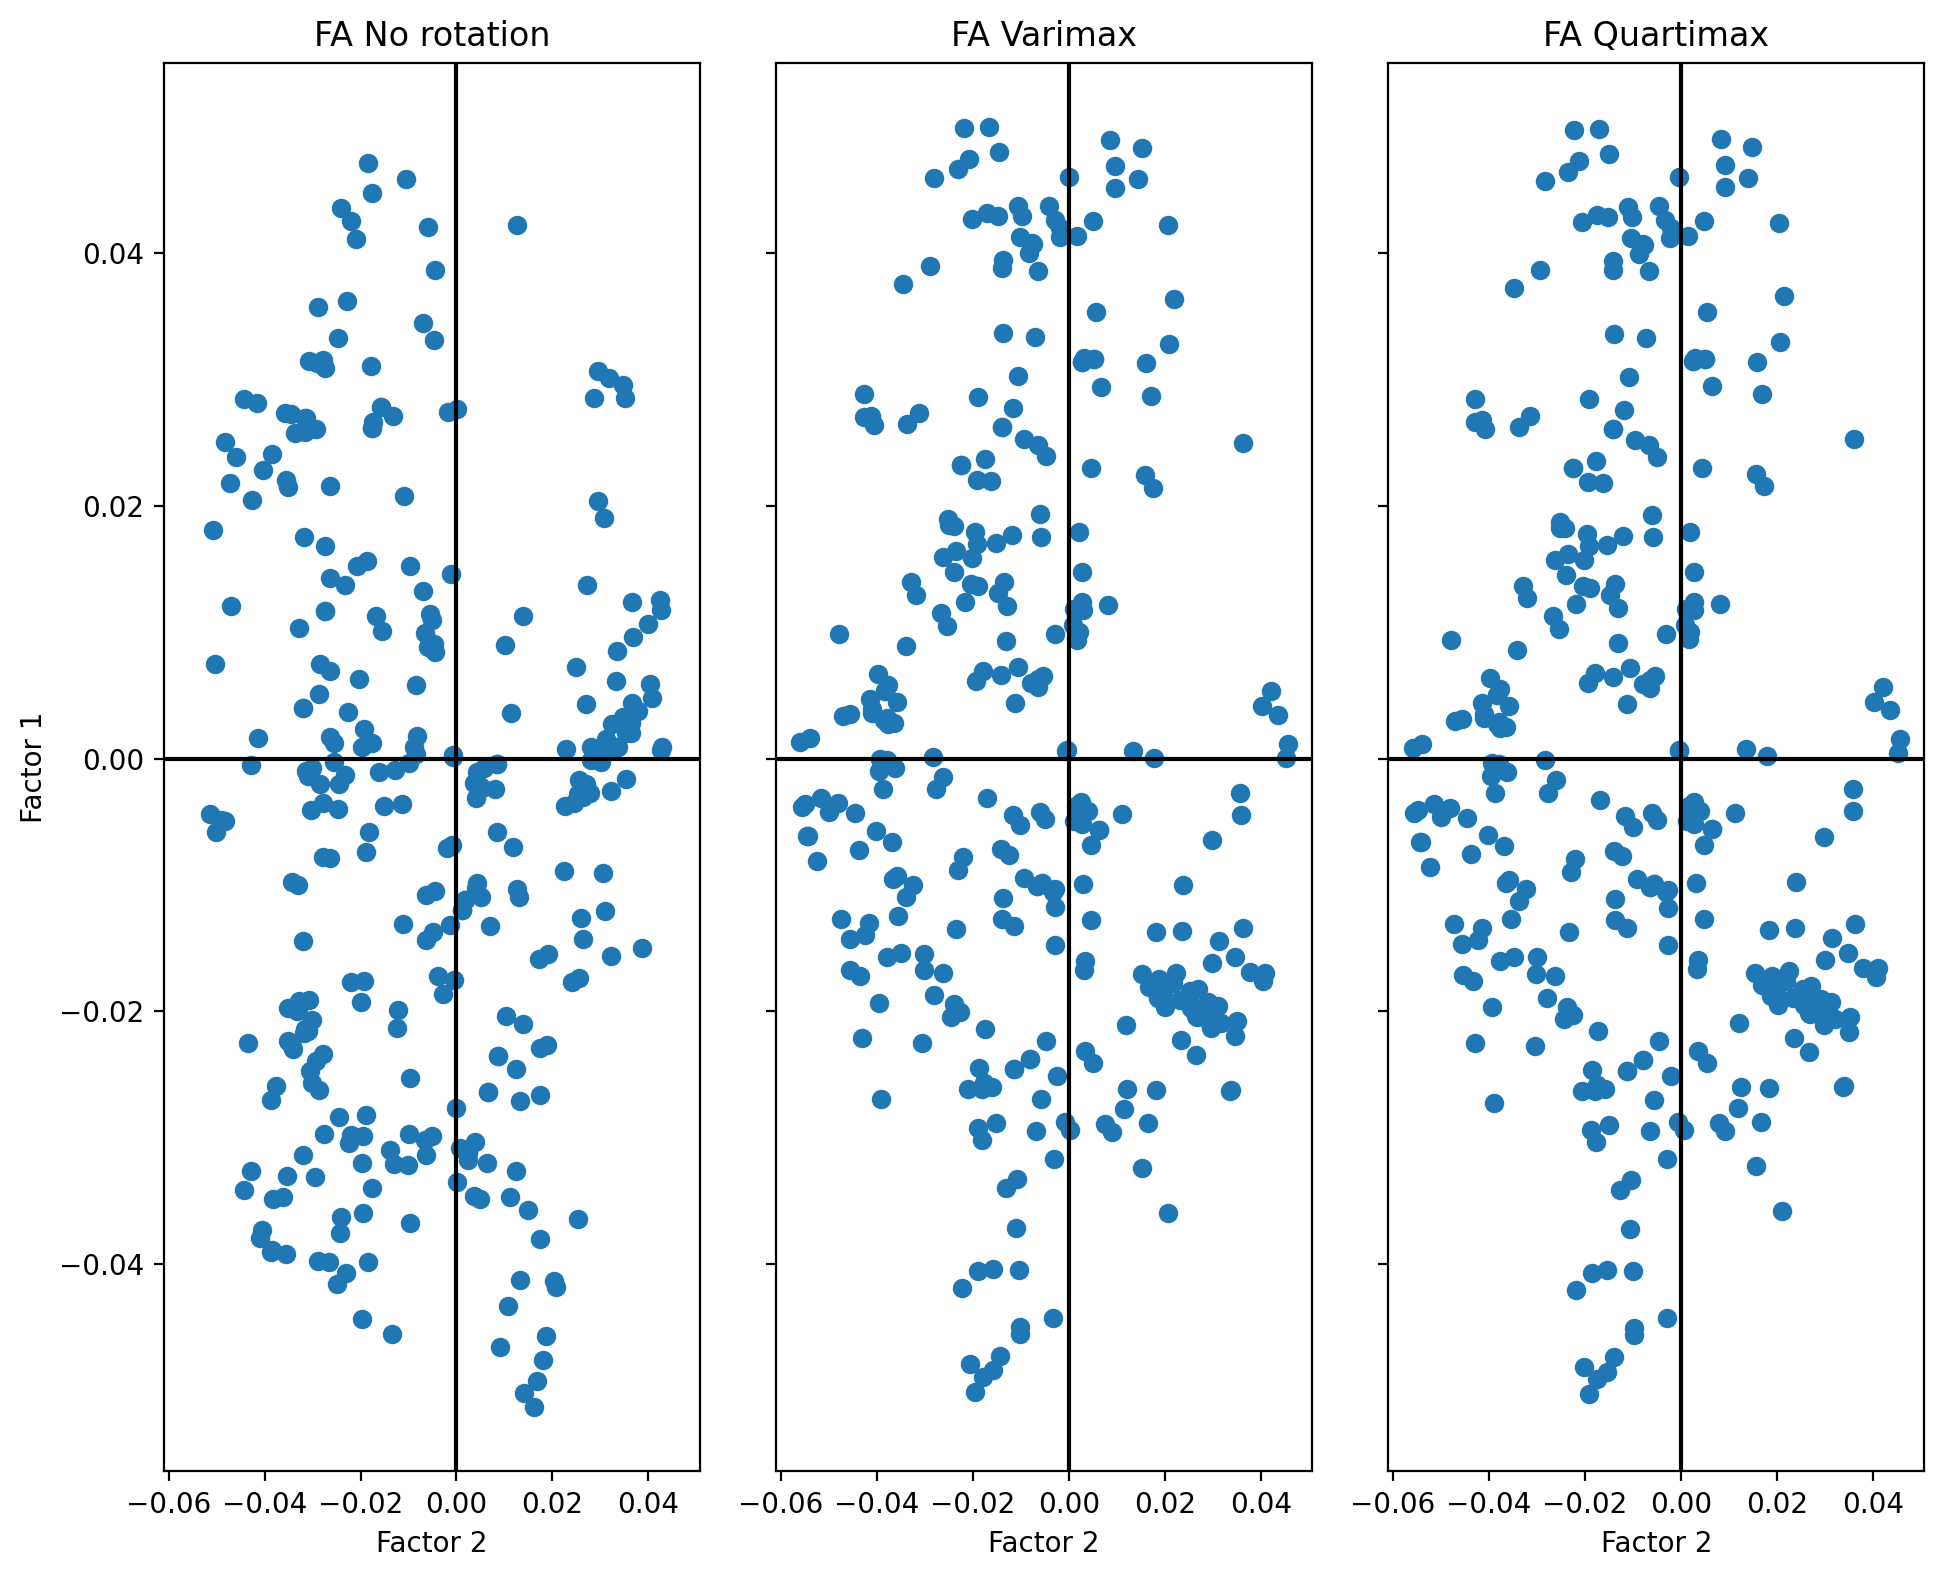

In [81]:
methods = [
    ("FA No rotation", FactorAnalysis(2,)),
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(X)

    components = fa.components_

    vmax = np.abs(components).max()
    ax.scatter(components[0,:], components[1, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')
#    for i,j, z in zip(components[0, :], components[1, :], df_X.columns):
#        ax.text(i+.02, j+.02, str(z), ha="center")
    ax.set_title(str(method))
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()

# Linear Discrimant Analysis

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X = lda.fit_transform(X, y)


ValueError: ignored